In [100]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [101]:
def initialize_population(n, population_size):
    return [random.sample(range(1, n + 1), n) for _ in range(population_size)]

def fitness(chromosome, n):
    conflicts = 0
    row_col_conflicts = abs(len(chromosome) - len(set(chromosome)))
    conflicts += row_col_conflicts

    for i in range(len(chromosome)):
        for j in range(i + 1, len(chromosome)):
            if i - chromosome[i] == j - chromosome[j] or i + chromosome[i] == j + chromosome[j]:
                conflicts += 1

    return n - conflicts

def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def two_point_crossover(parent1, parent2):
    crossover_points = sorted(random.sample(range(len(parent1)), 2))
    child1 = parent1[:crossover_points[0]] + parent2[crossover_points[0]:crossover_points[1]] + parent1[crossover_points[1]:]
    child2 = parent2[:crossover_points[0]] + parent1[crossover_points[0]:crossover_points[1]] + parent2[crossover_points[1]:]
    return child1, child2

def uniform_crossover(parent1, parent2):
    child1, child2 = [], []
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1.append(parent2[i])
            child2.append(parent1[i])
    return child1, child2

def mutate(chromosome):
    index = random.randint(0, len(chromosome) - 1)
    chromosome[index] = random.randint(1, len(chromosome))
    return chromosome

def elitism_selection(population, n, k=5):
    sorted_population = sorted(population, key=lambda x: fitness(x, n), reverse=True)
    top_k = sorted_population[:k]
    return random.choice(top_k)

def roulette_wheel_selection(population, n):
    fitness_values = [fitness(chromosome, n) for chromosome in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness_value / total_fitness for fitness_value in fitness_values]
    return random.choices(population, probabilities)[0]

def tournament_selection(population, n, tournament_size=3):
    selected = random.sample(population, tournament_size)
    selected = sorted(selected, key=lambda x: fitness(x, n), reverse=True)
    return selected[0]

In [102]:
def genetic_algorithm(n, population_size, generations, selection_method, crossover_method):
    population = initialize_population(n, population_size)

    for ـ in range(generations):
        population = sorted(population, key=lambda x: fitness(x, n), reverse=True)
        if fitness(population[0], n) == n:
            break

        next_generation = population[:2]
        while len(next_generation) < population_size:
            parent1 = selection_method(population, n)
            parent2 = selection_method(population, n)
            child1, child2 = crossover_method(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            next_generation.append(child1)
            next_generation.append(child2)

        population = next_generation

    return population[0]

In [121]:
def visualize_board(chromosome):
    n = len(chromosome)
    board = np.zeros((n, n, 3))

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = [1, 1, 1]
            else:
                board[i, j] = [0, 0, 0]

    for i in range(n):
        board[i, chromosome[i] - 1] = [1, 0, 0]

    plt.imshow(board)
    plt.xticks(range(n), [])
    plt.yticks(range(n), [])
    plt.grid(True, which='both', color='black', linewidth=1)
    plt.show()

Solution: [7, 4, 13, 8, 12, 15, 3, 11, 2, 5, 9, 1, 10, 14, 16, 6]
Fitness: 16
Execution time: 0.468590 seconds


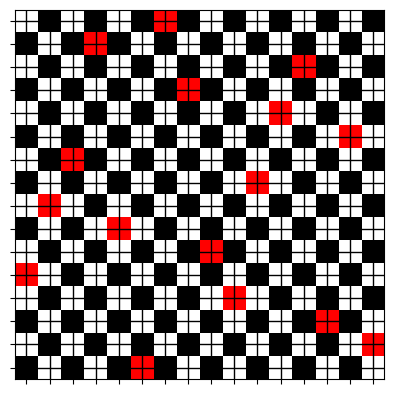

In [123]:
if __name__ == "__main__":
    n = 16
    population_size = 100
    generations = 1000

    selection_method = tournament_selection
    crossover_method = two_point_crossover

    start_time = time.time()
    solution = genetic_algorithm(n, population_size, generations, selection_method, crossover_method)
    execution_time = time.time() - start_time

    print("Solution:", solution)
    print("Fitness:", fitness(solution, n))
    print("Execution time: {:.6f} seconds".format(execution_time))

    visualize_board(solution)

In [105]:
validation = []
num_iter = 10
selection_methods = tournament_selection
crossover_methods = two_point_crossover

for _ in range(num_iter):
    solution = genetic_algorithm(n, population_size, generations, selection_methods, crossover_methods)
    validation.append(fitness(solution, n))

complete_answers = 0
for fit in validation:
    if fit == n:
        complete_answers+=1
    else:
        continue

print(f'Fitnesses are: {validation}')
print(f'We run the algorithm for {num_iter} times and {complete_answers} times we get the correct answer')
print(f'Score for algorithm: {complete_answers/num_iter}')

Fitnesses are: [15, 15, 15, 15, 15, 15, 14, 15, 15, 16]
We run the algorithm for 10 times and 1 times we get the correct answer
Score for algorithm: 0.1


In [106]:
selection_methods = {
    'elitism': elitism_selection,
    'roulette_wheel': roulette_wheel_selection,
    'tournament': tournament_selection
}

crossover_methods = {
    'one_point': one_point_crossover,
    'two_point': two_point_crossover,
    'uniform': uniform_crossover,
}

results = []

for selection_name, selection_method in selection_methods.items():
    for crossover_name, crossover_method in crossover_methods.items():
        avg_fitness = 0
        execution_time = 0

        for _ in range(10):
            start_time = time.time()
            solution = genetic_algorithm(n, population_size, generations, selection_method, crossover_method)
            execution_time += time.time() - start_time
            avg_fitness += fitness(solution, n)

        avg_fitness /= 10
        execution_time /= 10

        results.append({
            'selection': selection_name,
            'crossover': crossover_name,
            'average_fitness': avg_fitness,
            'execution_time': execution_time
        })

for result in results:
    print("Selection: {}, Crossover: {}, Average Fitness: {:.2f}, Execution Time: {:.2f} seconds".format(
        result['selection'], result['crossover'], result['average_fitness'], result['execution_time']))

Selection: elitism, Crossover: one_point, Average Fitness: 15.40, Execution Time: 7.30 seconds
Selection: elitism, Crossover: two_point, Average Fitness: 15.40, Execution Time: 6.52 seconds
Selection: elitism, Crossover: uniform, Average Fitness: 15.30, Execution Time: 7.97 seconds
Selection: roulette_wheel, Crossover: one_point, Average Fitness: 14.50, Execution Time: 10.37 seconds
Selection: roulette_wheel, Crossover: two_point, Average Fitness: 14.50, Execution Time: 10.32 seconds
Selection: roulette_wheel, Crossover: uniform, Average Fitness: 14.60, Execution Time: 9.84 seconds
Selection: tournament, Crossover: one_point, Average Fitness: 15.10, Execution Time: 0.74 seconds
Selection: tournament, Crossover: two_point, Average Fitness: 15.40, Execution Time: 0.62 seconds
Selection: tournament, Crossover: uniform, Average Fitness: 15.10, Execution Time: 0.74 seconds


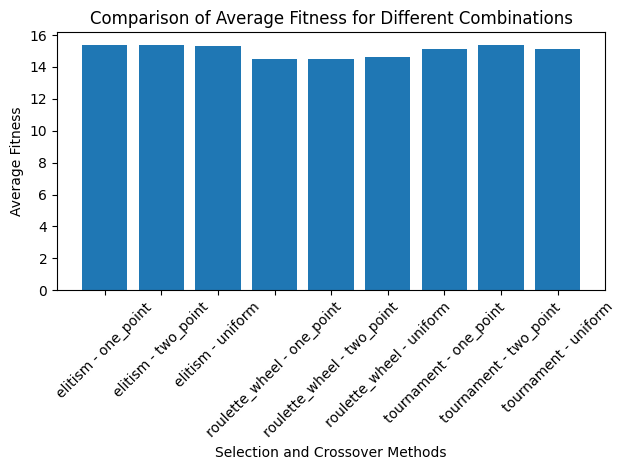

In [108]:
import matplotlib.pyplot as plt

def plot_fitness(results):
    labels = [f"{r['selection']} - {r['crossover']}" for r in results]
    fitness_values = [r['average_fitness'] for r in results]

    x = range(len(labels))

    plt.bar(x, fitness_values)
    plt.xticks(x, labels, rotation=45)
    plt.xlabel('Selection and Crossover Methods')
    plt.ylabel('Average Fitness')
    plt.title('Comparison of Average Fitness for Different Combinations')
    plt.tight_layout()
    plt.show()

plot_fitness(results)